In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [15]:
data = pd.read_csv('diabetes_selected.csv')

In [16]:
data.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


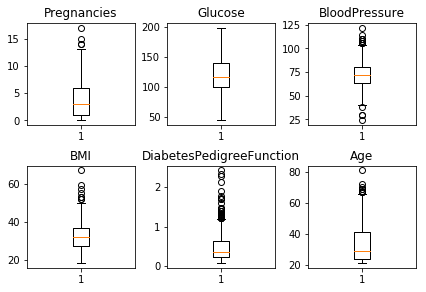

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']

fig, axs = plt.subplots(2, 3)

for colum in range(0, len(columns)):
    row = int(colum / 3)
    col = colum % 3
    axs[row, col].boxplot(data[columns[colum]])
    axs[row, col].set_title(columns[colum])

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

plt.show()

In [58]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[0.63994726 0.86525364 0.02064527 ... 0.46849198 1.4259954  1.36589591]
 [0.84488505 1.20601255 0.51613175 ... 0.36506078 0.19067191 0.73212021]
 [1.23388019 2.01595708 0.68129391 ... 0.60439732 0.10558415 1.36589591]
 ...
 [0.3429808  0.02243187 0.02064527 ... 0.68519336 0.27575966 0.73212021]
 [0.84488505 0.14195434 1.01161824 ... 0.37110101 1.17073215 1.36589591]
 [0.84488505 0.94299462 0.18580743 ... 0.47378505 0.87137393 0.73212021]]


In [68]:
threshold = 2
data_t = data[(z < threshold).all(axis=1)]

In [69]:
Q1 = data_t.quantile(0.25)
Q3 = data_t.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                  4.00000
Glucose                     33.00000
BloodPressure               14.00000
BMI                          8.22500
DiabetesPedigreeFunction     0.32475
Age                         13.00000
Outcome                      1.00000
dtype: float64


In [70]:
data_out = data_t[~((data_t < (Q1 - 1.5 * IQR)) |(data_t > (Q3 + 1.5 * IQR))).any(axis=1)]

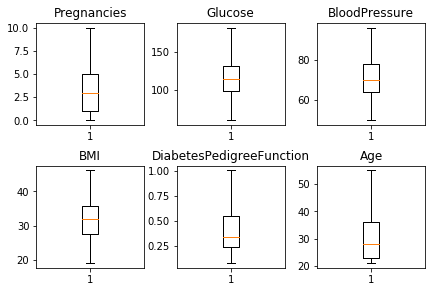

In [71]:
fig, axs = plt.subplots(2, 3)

for colum in range(0, len(columns)):
    row = int(colum / 3)
    col = colum % 3
    axs[row, col].boxplot(data_out[columns[colum]])
    axs[row, col].set_title(columns[colum])

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

plt.show()

In [72]:
data_out.to_csv('diabetes_selected_without_outliers.csv', index=None)